In [3]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf
import random

In [4]:
m1 = [1,1]      # consider a random mean and covariance value
m2 = [7,7]
cov1 = [[3, 2], [2, 3]]                                      
cov2 = [[2, -1], [-1, 2]]
x = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis=0)

In [5]:
print(d)

[[ 1.64073627e+00  2.53002706e+00]
 [ 3.00926968e+00  3.61447402e+00]
 [ 2.04613948e-01  1.86003281e+00]
 [ 9.37576513e-01 -5.58669522e-01]
 [-1.02143229e+00  7.81227798e-01]
 [ 2.99476823e+00  3.27093125e+00]
 [ 8.68540848e-01  3.68112025e-01]
 [-1.55448738e+00 -5.85071164e-01]
 [-1.63535443e+00 -3.67064834e-01]
 [-1.67101811e+00  5.44766136e-01]
 [ 4.56040310e-01  1.11558741e+00]
 [ 1.38338794e+00  1.91934727e-01]
 [ 1.28542523e+00  5.87441310e-01]
 [ 2.34374759e+00  1.42123068e+00]
 [-1.49212783e+00 -1.47907189e+00]
 [-8.00766862e-01  1.08115548e+00]
 [ 2.20283104e+00 -2.61989630e-01]
 [ 4.22653194e+00  2.81781173e+00]
 [-3.06007920e-01 -7.73639910e-01]
 [ 2.78662359e+00  9.21730269e-01]
 [-1.56241506e+00  1.10578308e-01]
 [ 4.67499831e-02  5.20791626e-01]
 [-8.05982743e-01  5.11544600e-02]
 [ 3.28493590e+00  4.75991798e+00]
 [ 3.61996160e+00  2.33783906e+00]
 [-7.22945293e-01  1.49345049e-01]
 [-1.84485399e-01  1.12789533e-01]
 [ 1.06635399e+00  1.20403637e+00]
 [-1.13763010e+00  6

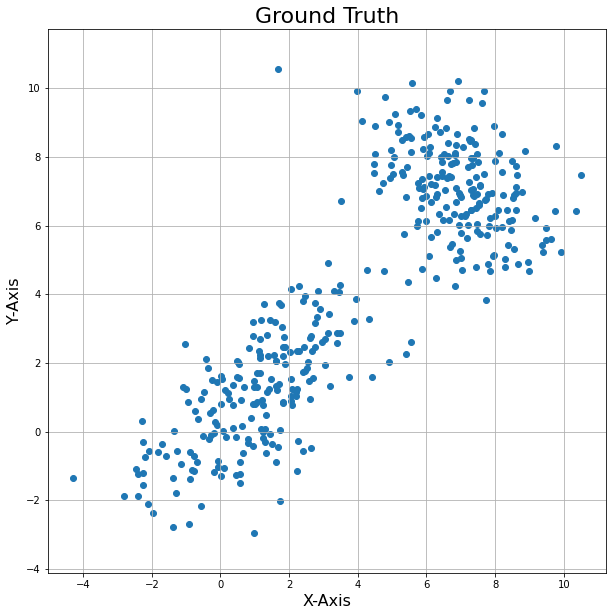

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(d[:,0], d[:,1], marker='o')
plt.axis('equal')
plt.xlabel('X-Axis', fontsize=16)
plt.ylabel('Y-Axis', fontsize=16)
plt.title('Ground Truth', fontsize=22)
plt.grid()
plt.show()

In [6]:
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

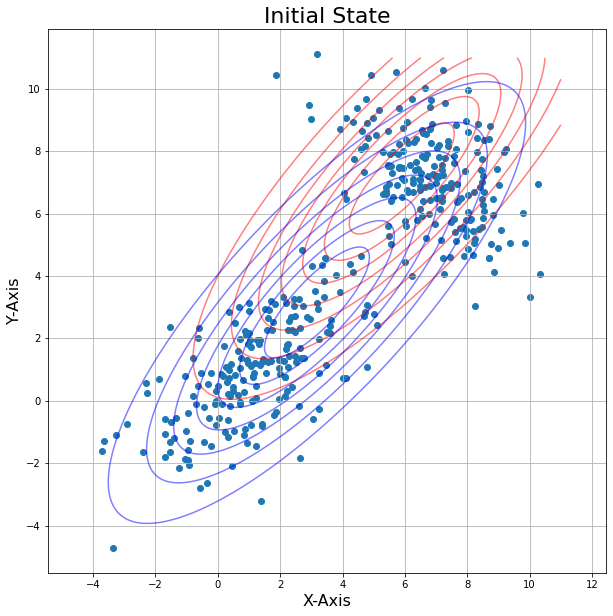

In [8]:
x1 = np.linspace(-4,11,200)
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))            # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [9]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [10]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [11]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

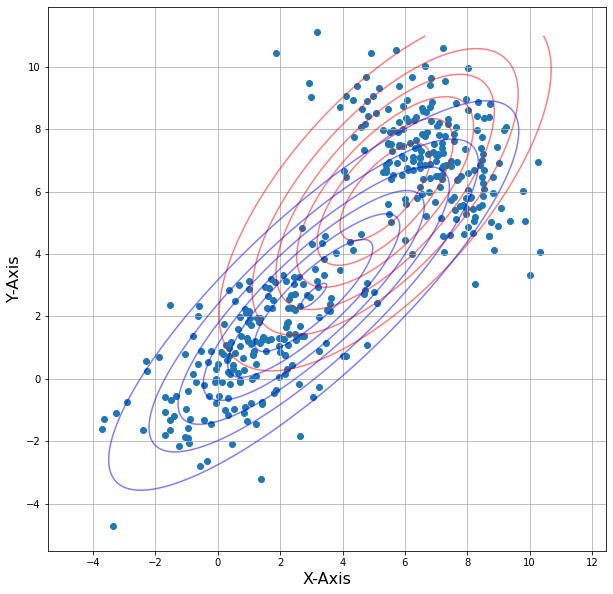

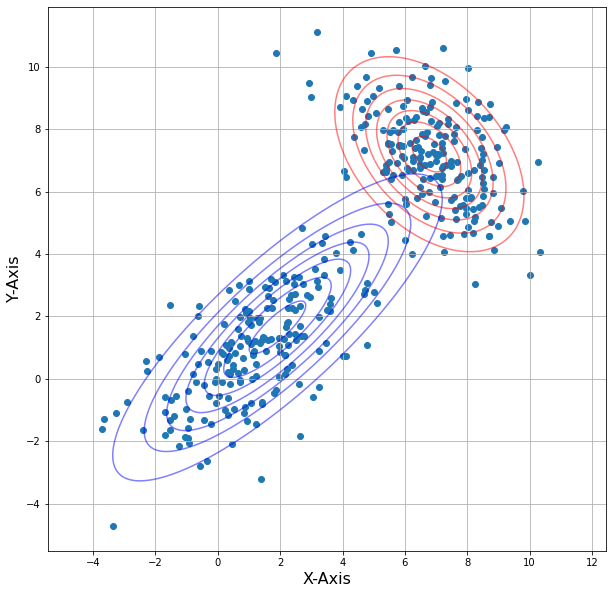

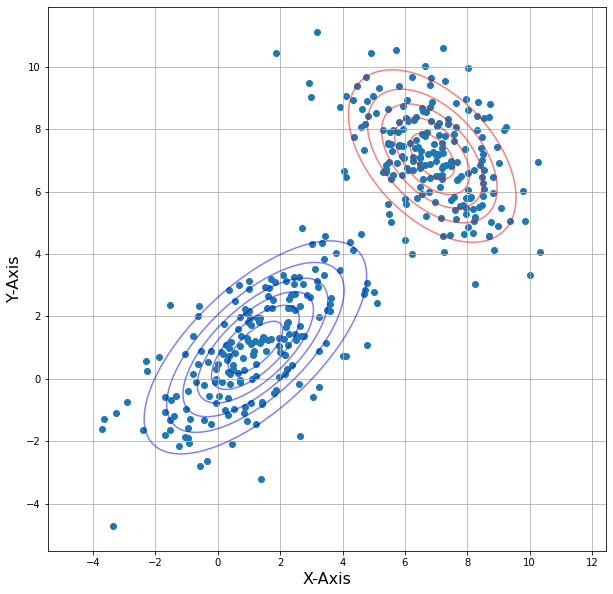

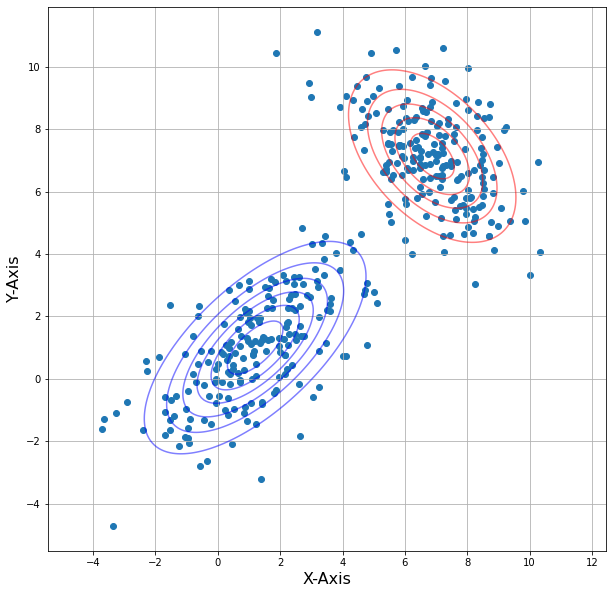

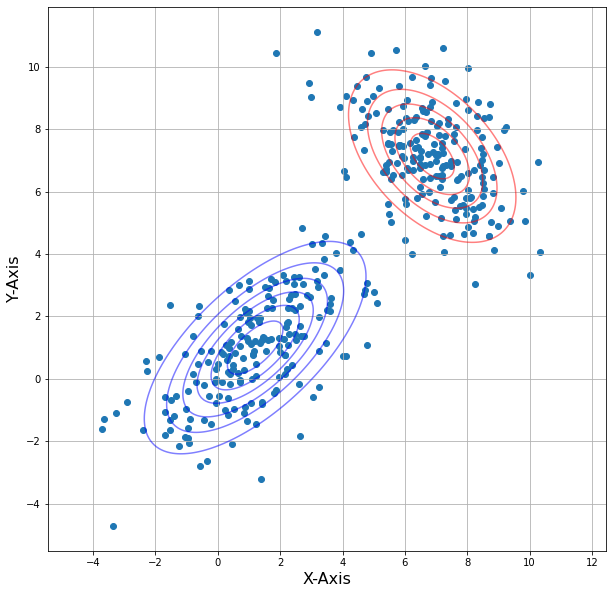

In [12]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)